# **AP157 Machine Learning Lab Assignment**
### Module B1: Digital Image Formation and Enhancement

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This lab assignment is based on the AP157 modules of Dr. Maricor Soriano and scripts created by Mr. Rene Principe

### Student Information

_Full Name (Last Name, First Name)_: \
_Student No._:\
_Section_:

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/30
* Part 2 - []/30
* Part 3 - []/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["font.family"] = "Arial"

#### PART 1 - Create synthetic greyscale images *(30 points)*

Simulate a 1 cm x 1 cm optical element with a sinusoid along the x-direction with a given frequency-- generate images with frequencies of 1, 3, and 5 cycles/cm. The size of each image should be 400x400 pixels.

For each frequency, show the:
1. [15 pts.; 5 pts. each] Image heatmap (range of pixel values should be between 0 to 255)
2. [15 pts.; 5 pts. each] Plot showing 3-D view



Sample output for frequency of 5 cycles/cm is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link



([], [])

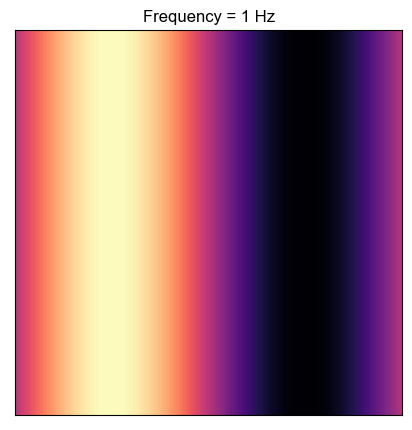

In [2]:
def sine(X, freq):
    return np.sin(freq*2*np.pi*X)

N = 500
line = np.linspace(0, 1, N)
X, Y = np.meshgrid(line, line)

plt.figure(figsize=(5,5))
plt.contourf(X, Y, sine(X, 1), 100, cmap='magma')
plt.title('Frequency = 1 Hz')
plt.xticks([])
plt.yticks([])

Text(0.5, 0.92, 'Frequency = 1 Hz')

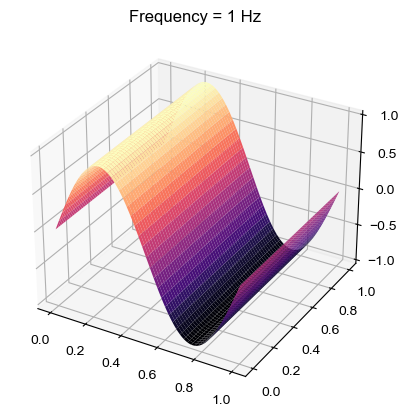

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.set_zlim(-1.01, 1.01)
ax.plot_surface(X, Y, sine(X, 1), cmap='magma')
ax.set_title('Frequency = 1 Hz')

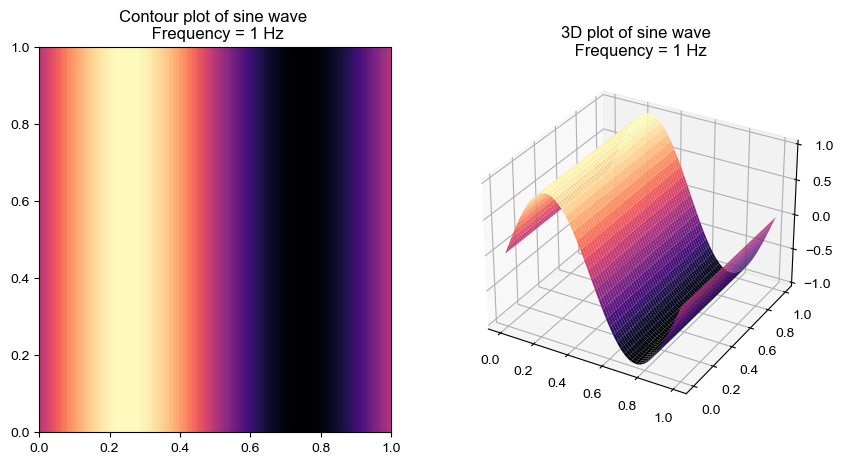

In [4]:
fig = plt.figure(figsize=(10, 5))

# Contour plot
ax = fig.add_subplot(1, 2, 1)
ax.contourf(X, Y, sine(X, 1), 100, cmap='magma')
ax.set_title('Contour plot of sine wave \n Frequency = 1 Hz')

# 3D plot
ax = fig.add_subplot(1, 2, 2, projection='3d') # need yung projection='3d' kasi 3d plot to
ax.set_zlim(-1.01, 1.01)
ax.plot_surface(X, Y, sine(X, 1), cmap='magma')
ax.set_title('3D plot of sine wave \n Frequency = 1 Hz')

plt.show()

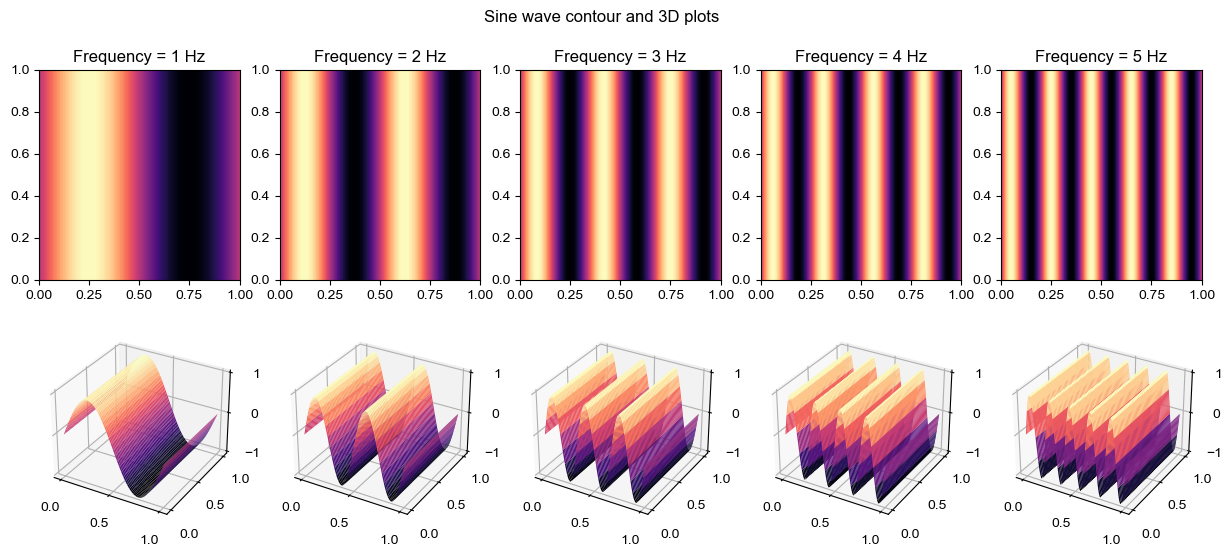

In [5]:
fig = plt.figure(figsize=(15, 6))

plt.suptitle('Sine wave contour and 3D plots')

for i in range(1, 5+1):
    # Contour plot
    ax = fig.add_subplot(2, 5, i)
    ax.contourf(X, Y, sine(X, i), 100, cmap='magma')
    ax.set_title('Frequency = {freq} Hz'.format(freq=i))

    # 3D plot
    ax = fig.add_subplot(2, 5, 5+i, projection='3d') # need yung projection='3d' kasi 3d plot to
    ax.set_zlim(-1.01, 1.01)
    ax.plot_surface(X, Y, sine(X, i), cmap='magma')
    #ax.set_title('3D plot of sine wave \n Frequency = {freq} Hz'.format(freq=i))

plt.show()

#### PART 2 - Create color images *(30 points)*

Recreate the Olympics logo as an image. It is fine if the colors overlap where the rings intersect.

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/1770FiH4FPm0C_fCpRGorr64x-RIv9UOY/view?usp=drive_link

Let's try to create circles first

In [6]:
n = 100

mpt = np.zeros([n, n])

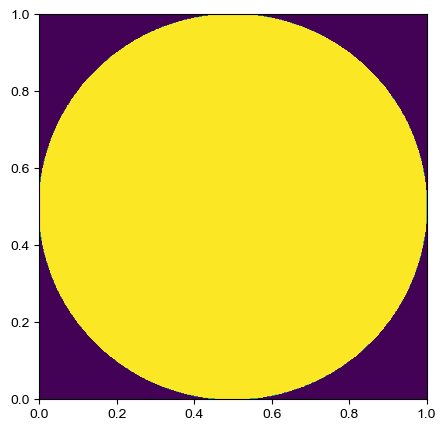

In [7]:
rad = 0.5
def circ(xi, yi, x0, y0, rad):
    condlist = [np.sqrt((xi-x0)**2 + (yi-y0)**2) <= rad, np.sqrt((xi-x0)**2 + (yi-y0)**2) > rad]
    choicelist = [1, 0]
    return np.select(condlist, choicelist)

plt.figure(figsize=(5,5))
plt.contourf(X, Y, circ(X, Y, 0.5, 0.5, 0.5), 100)

Let's try if we can add multiple `np.select`'s

$$
\begin{align}
(x-0.25)^2 + (y-0.25)^2 & = \left(0.25 \right)^2 \\
(x-0.75)^2 + (y-0.25)^2 & = \left(0.25 \right)^2 \\
(x-0.25)^2 + (y-0.75)^2 & = \left(0.25 \right)^2 \\
(x-0.75)^2 + (y-0.75)^2 & = \left(0.25 \right)^2
\end{align}
$$

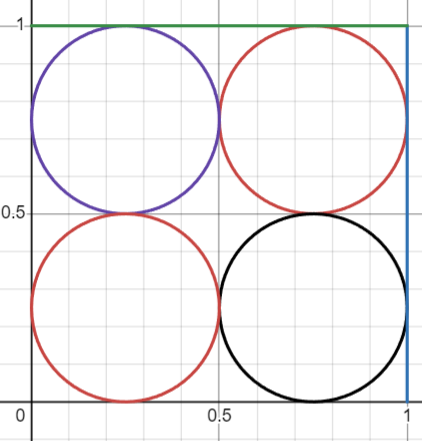

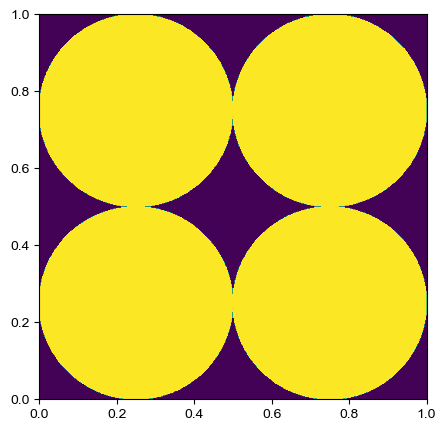

In [8]:
circle1 = circ(X, Y, 0.25, 0.25, 0.25)
circle2 = circ(X, Y, 0.75, 0.25, 0.25)
circle3 = circ(X, Y, 0.25, 0.75, 0.25)
circle4 = circ(X, Y, 0.75, 0.75, 0.25)
circs = circle1 + circle2 + circle3 + circle4

plt.figure(figsize=(5,5))
plt.contourf(X, Y, circs, 100)

Let's try to create an annulus then.

In [9]:
def anus(xi, yi, x0, y0, rin, rout):
    condlist = [np.sqrt((xi-x0)**2 + (yi-y0)**2) <= rout and np.sqrt((xi-x0)**2 + (yi-y0)**2) >= rin, \
        np.sqrt((xi-x0)**2 + (yi-y0)**2) > rout and np.sqrt((xi-x0)**2 + (yi-y0)**2) < rin]
    choicelist = [1, 0]
    return np.select(condlist, choicelist)

In [10]:
def anus(xi, yi, x0, y0, rin, rout):
    condlist = [np.logical_and(np.sqrt((xi-x0)**2 + (yi-y0)**2) <= rout, np.sqrt((xi-x0)**2 + (yi-y0)**2) >= rin), \
        np.logical_and(np.sqrt((xi-x0)**2 + (yi-y0)**2) > rout, np.sqrt((xi-x0)**2 + (yi-y0)**2) < rin)]
    choicelist = [1, 0]
    return np.select(condlist, choicelist)

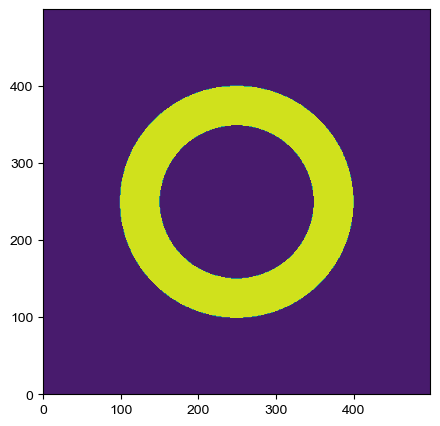

In [11]:
plt.figure(figsize=(5,5))
plt.contourf(anus(X, Y, 0.5, 0.5, 0.2, 0.3))

Let's try to combine various colors to get the prism effect.

$$ \begin{align}
\text{red circle:} & \left(x-0.5\right)^{2}+\left(y-0.65\right)^{2}=\left(0.25\right)^{2} \\
\text{blue circle:} & \left(x-0.35\right)^{2}+\left(y-0.40\right)^{2}=\left(0.25\right)^{2} \\
\text{green circle:} & \left(x-0.65\right)^{2}+\left(y-0.40\right)^{2}=\left(0.25\right)^{2} 
\end{align} $$

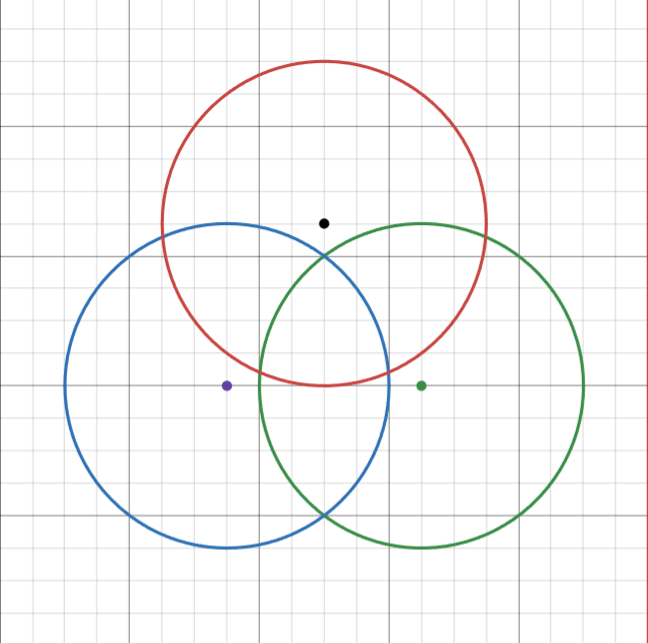

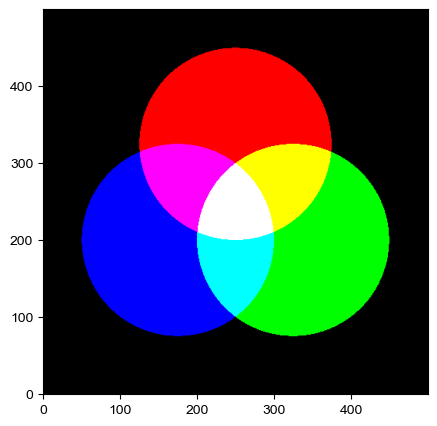

In [12]:
green_circ = circ(X, Y, 0.65, 0.40, 0.25)
blue_circ = circ(X, Y, 0.35, 0.40, 0.25)
red_circ = circ(X, Y, 0.50, 0.65, 0.25)

plt.figure(figsize=(5,5))
img = np.zeros((N, N, 3))
img[..., 0] = red_circ
img[..., 1] = green_circ
img[..., 2] = blue_circ
plt.imshow(img, origin='lower')
plt.show()

The olympic symbols look like this.

<p align = 'center'>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1920px-Olympic_rings_without_rims.svg.png" width=400, align=center>
</p>

We can do this on Desmos using:

$$ \begin{align}
\text{blue circle:} & \left(x-0.17\right)^{2}+\left(y-0.55\right)^{2}=\left(0.15\right)^{2} \\
\text{black circle:} & \left(x-0.5\right)^{2}+\left(y-0.55\right)^{2}=\left(0.15\right)^{2} \\
\text{red circle:} & \left(x-0.83\right)^{2}+\left(y-0.55\right)^{2}=\left(0.15\right)^{2} \\
\text{yellow circle:} & \left(x-0.35\right)^{2}+\left(y-0.40\right)^{2}=\left(0.15\right)^{2} \\
\text{green circle:} & \left(x-0.68\right)^{2}+\left(y-0.40\right)^{2}=\left(0.15\right)^{2}
\end{align} $$

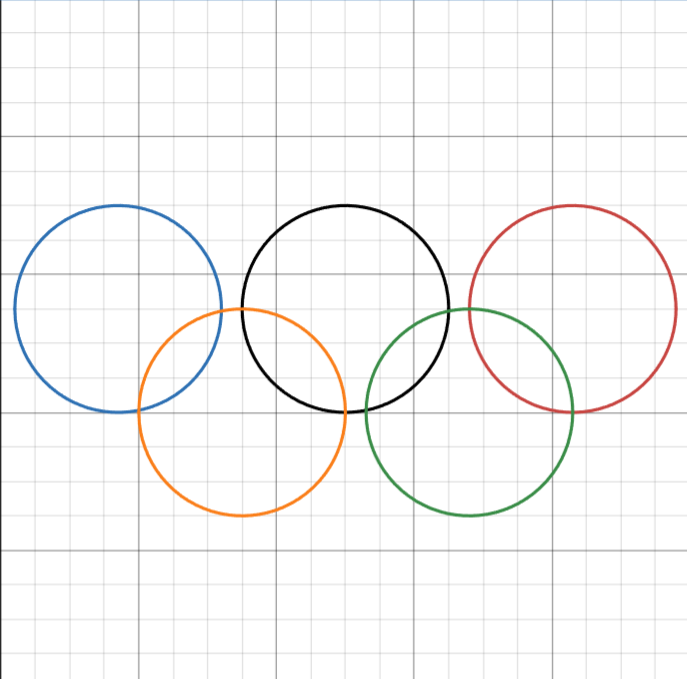

Since we only have red, green, and blue color channels, we need to combine circles in different color channels to create the desired color.
- blue circle: blue channel
- black circle: no channel
- red circle: red channel
- yellow circle: red and green channel
- green circle: green channel

One challenge here is how to create the black circle. Black is the absence of color. If we go by this principle, it will be hard to subtract everything just to get black.

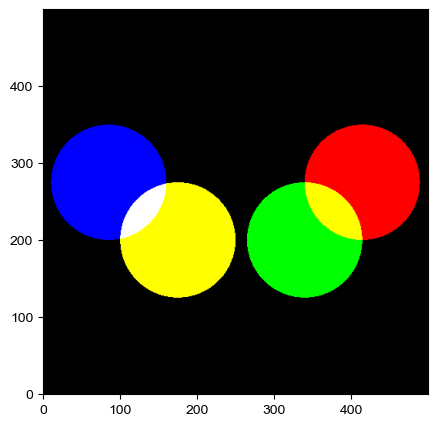

In [13]:
circ_bl = circ(X, Y, 0.17, 0.55, 0.15)
circ_bk = circ(X, Y, 0.50, 0.55, 0.15)
circ_r = circ(X, Y, 0.83, 0.55, 0.15)
circ_y = circ(X, Y, 0.35, 0.40, 0.15)
circ_g = circ(X, Y, 0.68, 0.40, 0.15)

plt.figure(figsize=(5,5))
img1 = np.zeros((N, N, 3))
img1[..., 0] = circ_r + circ_y # red channel
img1[..., 1] = circ_g + circ_y # green channel
img1[..., 2] = circ_bl # blue channel
plt.imshow(img1, origin='lower')
plt.show()

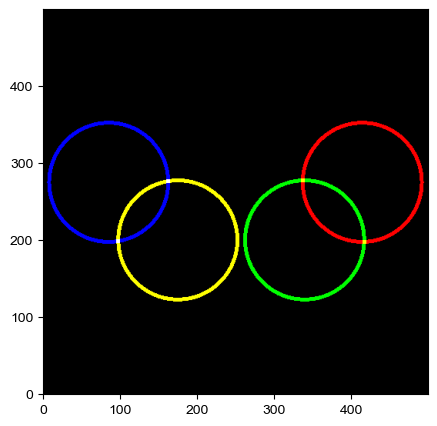

In [14]:
circ_bl = anus(X, Y, 0.17, 0.55, 0.15, 0.16)
circ_bk = anus(X, Y, 0.50, 0.55, 0.15, 0.16)
circ_r = anus(X, Y, 0.83, 0.55, 0.15, 0.16)
circ_y = anus(X, Y, 0.35, 0.40, 0.15, 0.16)
circ_g = anus(X, Y, 0.68, 0.40, 0.15, 0.16)

plt.figure(figsize=(5,5))
img1 = np.zeros((N, N, 3))
img1[..., 0] = circ_r + circ_y # red channel
img1[..., 1] = circ_g + circ_y # green channel
img1[..., 2] = circ_bl # blue channel
plt.imshow(img1, origin='lower')
plt.show()

Let's try adding the white colored background. Subtracting the pieces would also help. 

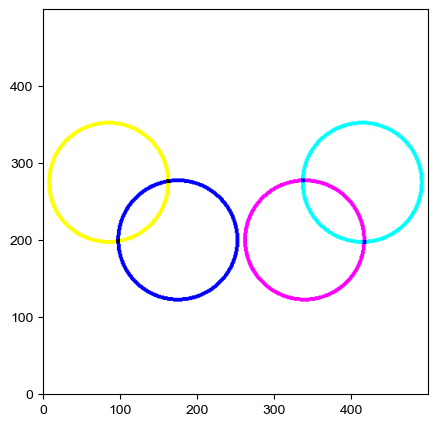

In [15]:
circ_bl = anus(X, Y, 0.17, 0.55, 0.15, 0.16)
circ_bk = anus(X, Y, 0.50, 0.55, 0.15, 0.16)
circ_r = anus(X, Y, 0.83, 0.55, 0.15, 0.16)
circ_y = anus(X, Y, 0.35, 0.40, 0.15, 0.16)
circ_g = anus(X, Y, 0.68, 0.40, 0.15, 0.16)

plt.figure(figsize=(5,5))
img1 = np.zeros((N, N, 3))
img1[..., 0] = np.ones((N, N)) - circ_r - circ_y # red channel
img1[..., 1] = np.ones((N, N)) - circ_g - circ_y # green channel
img1[..., 2] = np.ones((N, N)) - circ_bl # blue channel
plt.imshow(img1, origin='lower')
plt.show()

The colors changed which makes sense as 

$$ \begin{align}
w - b = (r+g+b) - b = r+g &= y \\
w - r = (r+g+b) - r = g+b &= c \\
w - y = (r+g+b) - (r+g) & = b \\
w - g = (r+g+b) - g = r+b & = m
\end{align} $$

If we want to do this subtraction method just to keep the white background, we need to subtract everything in the proper channels to get the proper colors. 

$$ \begin{align}
b & = w - r - g \\
k & = w - r - g - b \\
r & = w - b - g \\
y & = w - b \\
g & = w - r - b 
\end{align} $$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


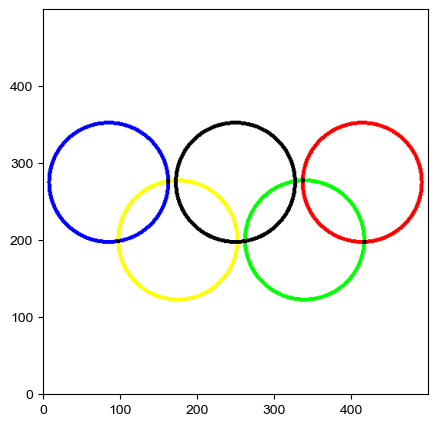

In [16]:
circ_bl = anus(X, Y, 0.17, 0.55, 0.15, 0.16)
circ_bk = anus(X, Y, 0.50, 0.55, 0.15, 0.16)
circ_r = anus(X, Y, 0.83, 0.55, 0.15, 0.16)
circ_y = anus(X, Y, 0.35, 0.40, 0.15, 0.16)
circ_g = anus(X, Y, 0.68, 0.40, 0.15, 0.16)

plt.figure(figsize=(5,5))
img2 = np.zeros((N, N, 3))
img2[..., 0] = np.ones((N, N)) - circ_bl - circ_bk - circ_g # red channel
img2[..., 1] = np.ones((N, N)) - circ_bl - circ_bk - circ_r # green channel
img2[..., 2] = np.ones((N, N)) - circ_bk - circ_r - circ_y - circ_g # blue channel
plt.imshow(img2, origin='lower')
plt.show()

#### PART 3 - Apply image enhancement *(40 points)*

Apply contrast stretching to an astronaut image.

Show the following:
1. [20 pts.] Original and contrast-stretched image
2. [10 pts.] Probability Distribution Function (PDF) plot showing curves for the original and contrast-stretched image
3. [10 pts.] Cumulative Distribution Function (CDF) plot showing curves for the original and contrast-stretched image

Sample output is uploaded to the Google Drive Datasets folder: https://drive.google.com/file/d/12-cPwAr7hVUPBKIthvcQgvqjvEOmwyxJ/view?usp=drive_link

First step is to load the image-- available from the scikit-image (skimage) library-- and make a low-contrast version, using the code below:

c:\Users\Ian\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


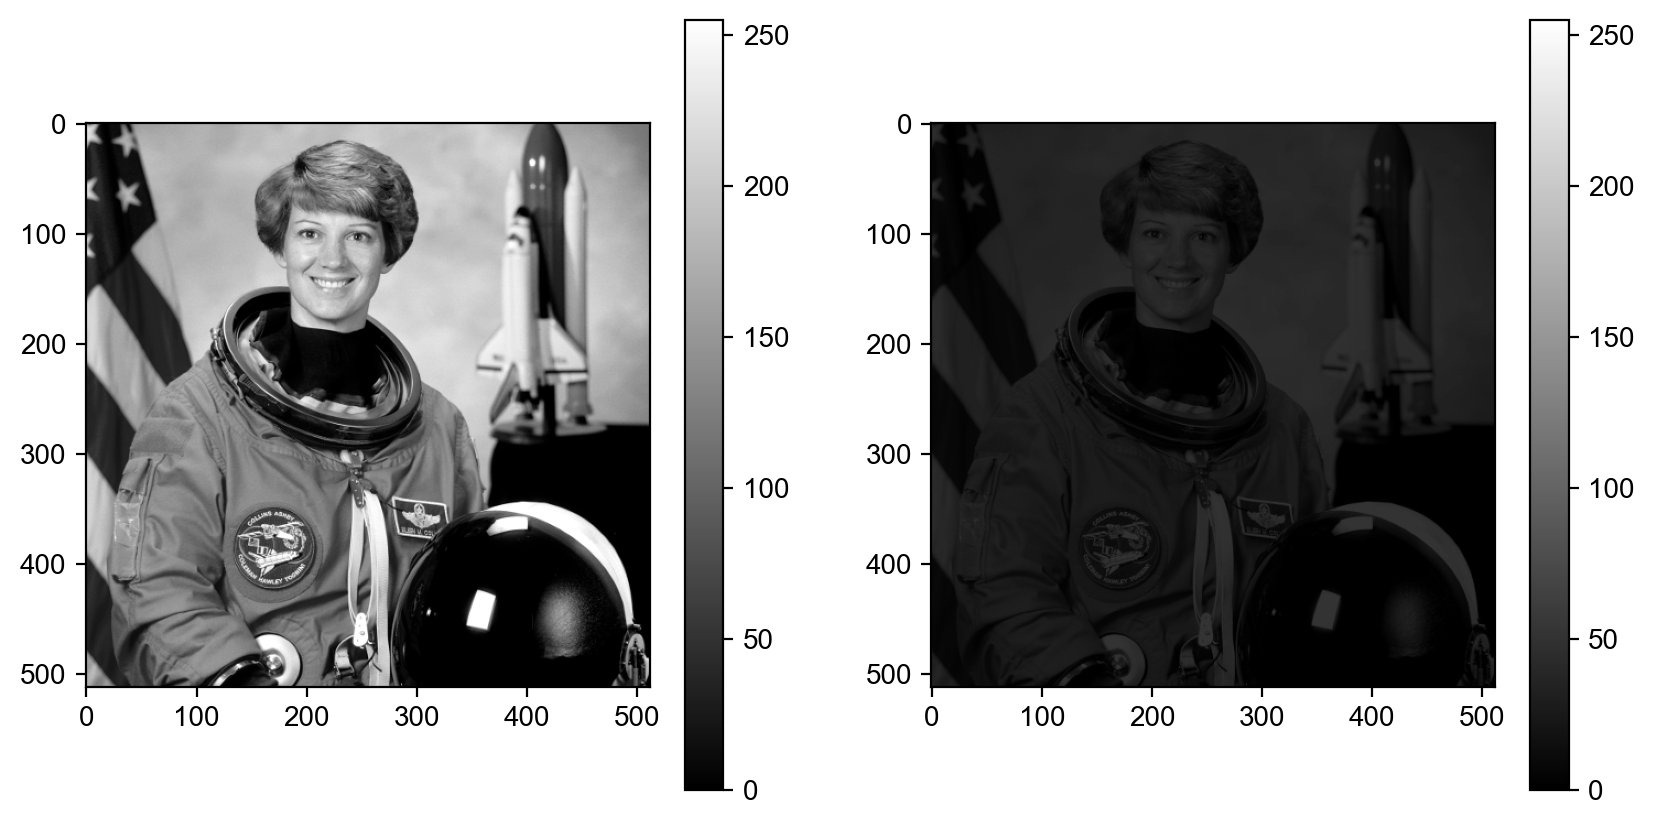

In [17]:
from skimage import color, data, exposure
from skimage.transform import rescale

img = color.rgb2gray(data.astronaut())*256 # original astronaut image
plt.figure(figsize=(10,5), dpi = 200)
plt.subplot(121)
plt.imshow(img, cmap = 'gray', vmax = 255)
plt.colorbar()

img_low_contrast = img/5 # low contrast astronaut image
plt.subplot(122)
plt.imshow(img_low_contrast, cmap = 'gray', vmax = 255)
plt.colorbar()

Next, write your code to apply contrast stretching, calculate the PDF and CDF of the original and contrast-stretched images. Finally, display the images and PDF and CDF plots.

Text(0.5, 1.0, 'Image histogram')

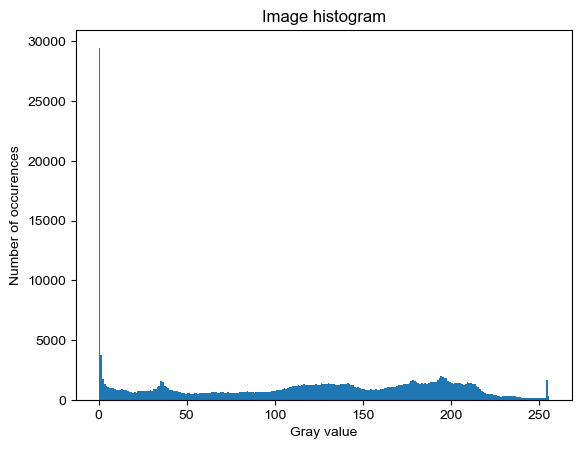

In [44]:
flat_img = img.flatten()
plt.hist(flat_img, bins=256)
plt.xlabel('Gray value')
plt.ylabel('Number of occurences')
plt.title('Image histogram')

In [29]:
img_tot = np.sum(flat_img)
flat_img = flat_img/img_tot
print(flat_img.shape)

(262144,)


In [84]:
hist = np.histogram(flat_img,bins=256)
norm_hist = hist[0]/np.sum(hist[0])
cum_hist = np.cumsum(norm_hist)

Text(0.5, 1.0, 'Normalized image histogram')

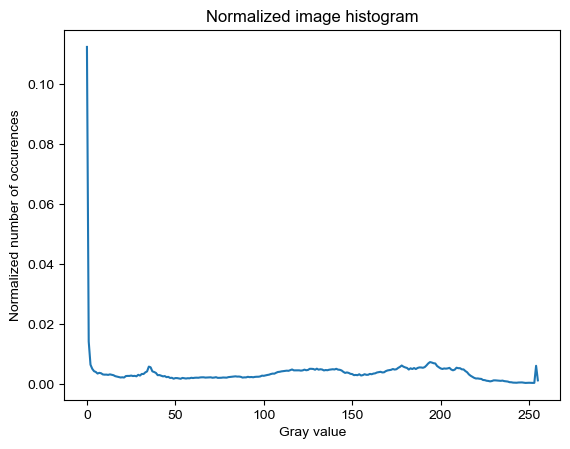

In [45]:
plt.plot(norm_hist)
plt.xlabel('Gray value')
plt.ylabel('Normalized number of occurences')
plt.title('Normalized image histogram')

Desired cumulative distribution functions

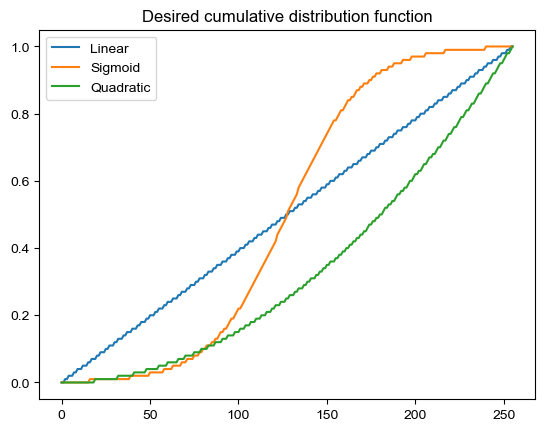

In [55]:
line = np.linspace(0, 1, 256)
# Generate a linear cumulative distribution function (CDF) array
cdf_line = np.round(line, 2)

# Generate a CDF array using the sigmoid function
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))
cdf_sig = np.round(sigmoid(np.linspace(-6, 6, 256)), 2)

# Generate an exponential curve
# expo = np.exp(line, 2)
# exp_tot = np.sum(expo)
# cdf_exp = np.round(expo/exp_tot)

# Generate a quadratic
cdf_quad = np.round((line)**2, 2)

plt.plot(cdf_line, label='Linear')
plt.plot(cdf_sig, label='Sigmoid')
plt.plot(cdf_quad, label='Quadratic')
plt.legend()
plt.title('Desired cumulative distribution function')
plt.show()

Backprojection taken from the module

Remember na CDF ang need hindi PDF

In [88]:
def backprojection(gray_value, cdf_desired, cdf_normalized):

    """
    Backprojection function for histogram matching.

    Parameters:
    - gray_value: The original gray value for which we want to find the corresponding value in the desired CDF.
    - cdf_desired: The desired Cumulative Distribution Function (CDF) to match.
    - cdf_normalized: The CDF of the original image that we want to adjust.

    Returns:
    - new_gray_value: The adjusted gray value that corresponds to the desired CDF.

    Explanation:
    This function performs backprojection, adjusting the gray value based on histogram matching.
    It finds the transformed value (T_r) in the normalized CDF, then maps it to the closest value in the desired CDF.
    The new gray value is the one that aligns with the desired CDF for better histogram matching.

    Example:
    Suppose gray_value is 100, and its normalized CDF value is 0.6.
    If in the desired CDF, the closest value to 0.6 is 110, then new_gray_value will be 110.

    Note:
    - This function assumes that cdf_desired and cdf_normalized are 1D arrays with values between 0 and 1.
    """
    # Get the T_r value from the normalized CDF
    T_r = cdf_normalized[gray_value]

    # Find the nearest value in the desired CDF to the rounded T_r value
    nearest_index = np.argmin(np.abs(cdf_desired - np.round(T_r, 2)))
    new_gray_value = nearest_index

    return new_gray_value

def histogram_back_projection(gray, cdf_desired, cdf_normalized):
    """
    Histogram back-projection with visualization.

    Parameters:
    - gray: Input grayscale image.
    - cdf_desired: Desired Cumulative Distribution Function (CDF) to match.

    Returns:
    - hbj: Histogram back-projected image.
    """

    # Initialize back-projection image
    hbj = np.zeros_like(gray)

    # Compute histogram and CDF of original image
    hist, bins = np.histogram(gray.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf.max()

    # Apply back-projection to each pixel in the image
    for i in range(np.shape(hbj)[0]):
        for j in range(np.shape(hbj)[1]):
            gray_value = gray[i][j]
            hbj[i][j] = backprojection(gray_value, cdf_desired, cdf_normalized)

    # Compute histogram and CDF of histogram-manipulated image
    hist_, bins_ = np.histogram(hbj.flatten(), 256, [0, 256])
    cdf_ = hist_.cumsum()
    cdf_normalized_ = cdf_ / cdf_.max()

    return cdf_normalized_

In [95]:
# Initialize back-projection image
hbj = np.zeros_like(img)

# Compute histogram and CDF of original image
# hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# cdf = hist.cumsum()
# cdf_normalized = cdf / cdf.max()

grays = []
# Apply back-projection to each pixel in the image
for i in range(np.shape(hbj)[0]):
    for j in range(np.shape(hbj)[1]):
        gray_value = img[i][j]
        hbj[i][j] = backprojection(gray_value, cdf_sig, cum_hist)
        grays.append(gray_value)

len(grays)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [101]:
for i in range(512):
    gray_value = img[i][0]
    print(hbj[i][0]) =  backprojection(gray_value, cdf_sig, cum_hist)
    # grays.append(gray_value)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [100]:
backprojection(0, cdf_sig, cum_hist)

82

In [89]:
histogram_back_projection(img, cdf_line, cum_hist)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [86]:
for i in range(255):
    print(i, backprojection(i, cdf_sig, cum_hist))

0 82
1 87
2 87
3 89
4 89
5 90
6 90
7 90
8 92
9 92
10 92
11 94
12 94
13 94
14 95
15 95
16 95
17 96
18 96
19 96
20 96
21 98
22 98
23 98
24 98
25 99
26 99
27 99
28 99
29 100
30 100
31 100
32 102
33 102
34 103
35 103
36 104
37 104
38 105
39 105
40 105
41 106
42 106
43 106
44 106
45 107
46 107
47 107
48 107
49 108
50 108
51 108
52 108
53 108
54 109
55 109
56 109
57 109
58 109
59 110
60 110
61 110
62 110
63 110
64 111
65 111
66 111
67 111
68 112
69 112
70 112
71 112
72 113
73 113
74 113
75 113
76 113
77 114
78 114
79 114
80 114
81 115
82 115
83 115
84 115
85 116
86 116
87 116
88 116
89 117
90 117
91 117
92 117
93 118
94 118
95 118
96 118
97 119
98 119
99 119
100 119
101 120
102 120
103 120
104 121
105 121
106 121
107 121
108 121
109 122
110 122
111 123
112 123
113 123
114 124
115 124
116 125
117 125
118 126
119 126
120 127
121 127
122 127
123 127
124 128
125 128
126 129
127 129
128 130
129 130
130 131
131 131
132 132
133 132
134 133
135 133
136 133
137 133
138 134
139 134
140 135
141 135
142

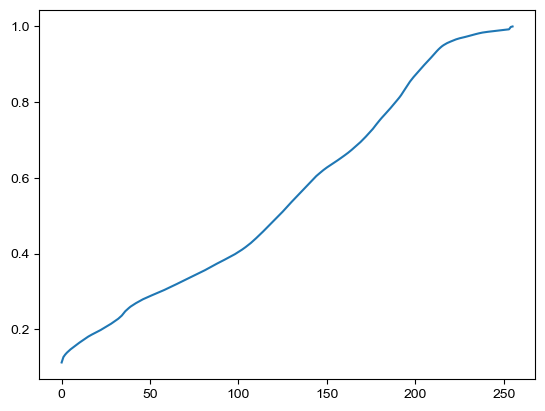

In [85]:
plt.plot(cum_hist)